In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Age&Income_Data.csv')

In [3]:
df.sample(5)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
66,39,Business,Married,Graduate,2,Yes,3600000,1500000
52,44,Salaried,Married,Post Graduate,4,No,2700000,1600000
18,29,Salaried,Single,Post Graduate,2,No,900000,1200000
59,28,Salaried,Single,Graduate,0,Yes,900000,700000
34,42,Salaried,Married,Graduate,4,Yes,2100000,1100000


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [5]:
df.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [6]:
df.describe(include="object")

,Profession,Marrital Status,Education,Personal loan
count,99,99,99,99
unique,2,2,2,2
top,Salaried,Married,Post Graduate,No
freq,64,84,56,67


In [7]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', 'Price'],
      dtype='object')

In [8]:
df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df.rename(columns={'Price':'EV_Price'},inplace=True)
df.sample(5)

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
75,36,Salaried,Married,Post Graduate,2,No,3600000,1500000
76,36,Business,Married,Post Graduate,2,Yes,1900000,800000
53,44,Business,Married,Post Graduate,3,No,3800000,1500000
30,41,Business,Married,Graduate,3,No,1100000,700000
98,51,Salaried,Married,Post Graduate,2,Yes,2200000,1100000


C:\Users\ppsam\AppData\Local\Temp\ipykernel_29196\4079495474.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])
C:\Users\ppsam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


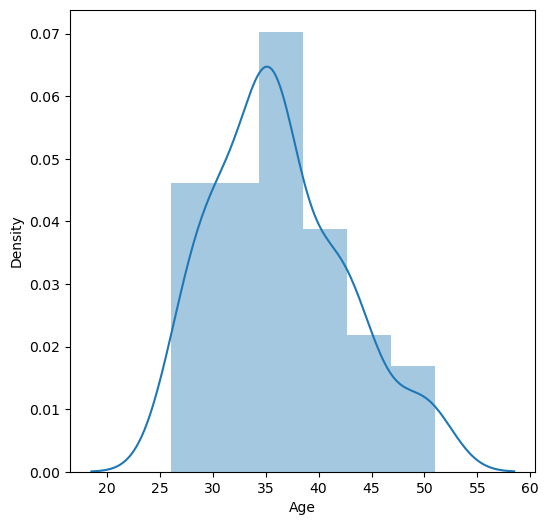

In [9]:
plt.figure(figsize=(6,6))
sns.distplot(df["Age"])
plt.show()

<Axes: ylabel='count'>

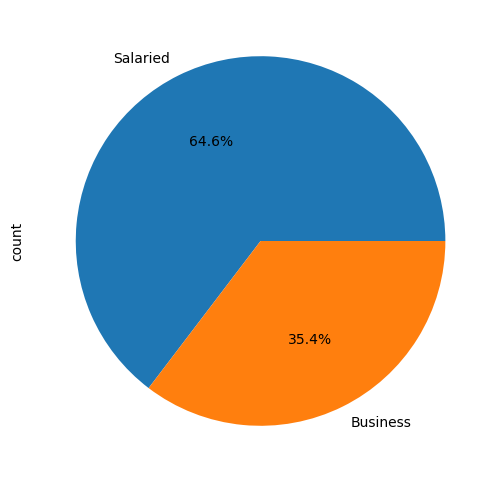

In [10]:
plt.figure(figsize=(6,6))
df["Profession"].value_counts().plot(kind="pie",autopct="%0.1f%%")

<Axes: ylabel='count'>

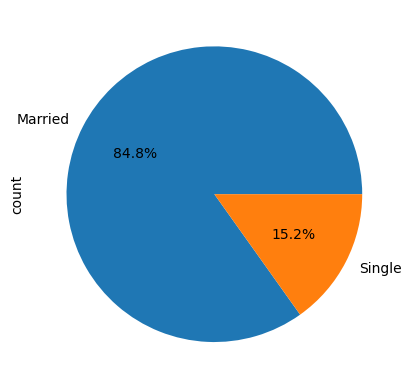

In [11]:
df["Marrital Status"].value_counts().plot(kind="pie",autopct="%0.1f%%")

<Axes: xlabel='No of Dependents'>

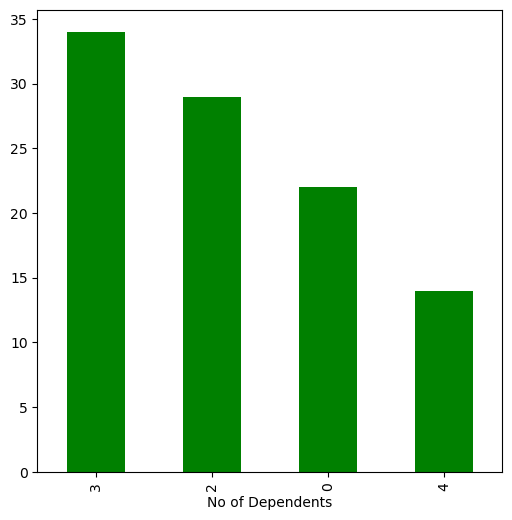

In [12]:
plt.figure(figsize=(6,6))
df["No of Dependents"].value_counts().plot(kind="bar",color="green")

C:\Users\ppsam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total Salary', ylabel='Count'>

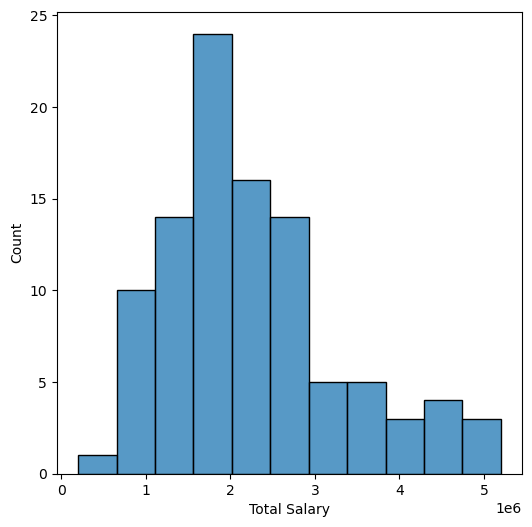

In [13]:
plt.figure(figsize=(6,6))
sns.histplot(df["Total Salary"])

<Axes: xlabel='Education'>

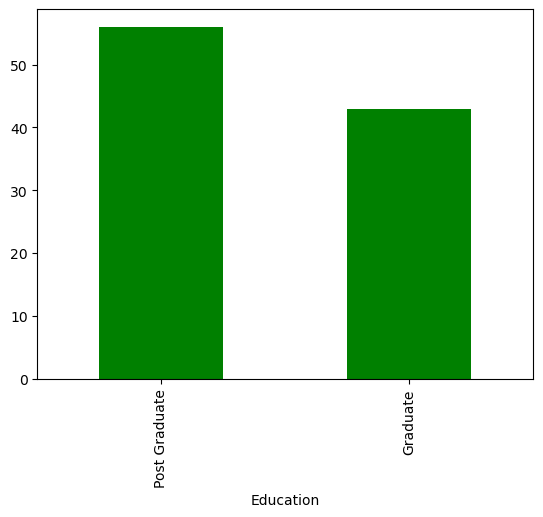

In [14]:
df["Education"].value_counts().plot(kind="bar",color="green")

<Axes: xlabel='Age', ylabel='count'>

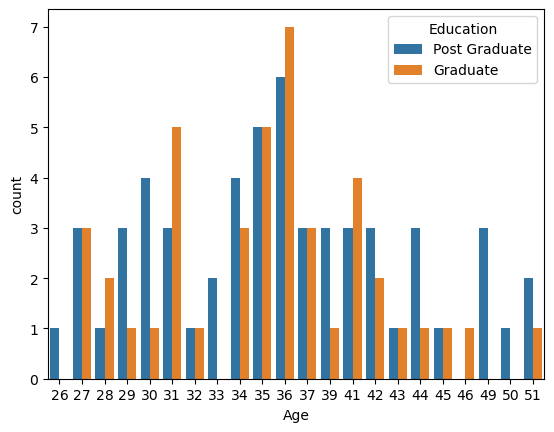

In [15]:
#plt.figure(figsize=(18,7))
sns.countplot(x="Age",data=df,hue="Education")

<Axes: xlabel='Education', ylabel='count'>

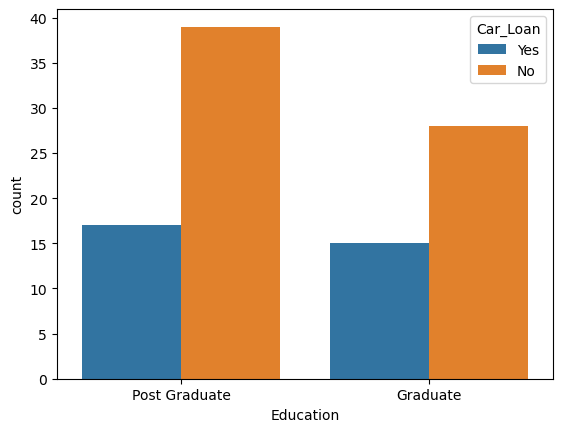

In [16]:
sns.countplot(x="Education",data=df,hue="Car_Loan")

<Axes: xlabel='Marrital Status', ylabel='count'>

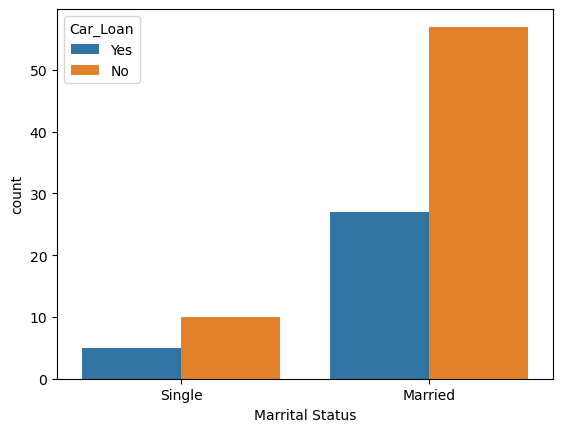

In [17]:
sns.countplot(x="Marrital Status",data=df,hue="Car_Loan")

<Axes: xlabel='Profession', ylabel='count'>

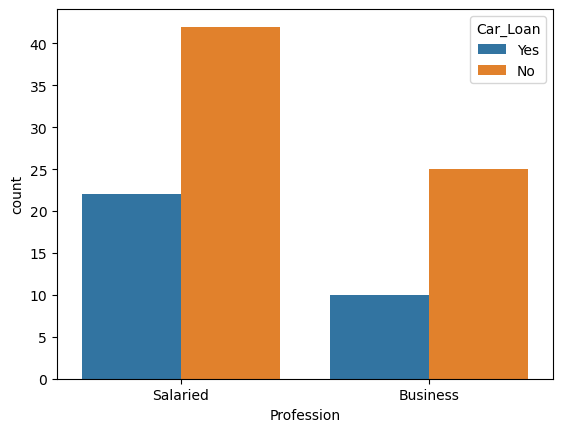

In [18]:
sns.countplot(x="Profession",data=df,hue="Car_Loan")

<Axes: xlabel='No of Dependents', ylabel='count'>

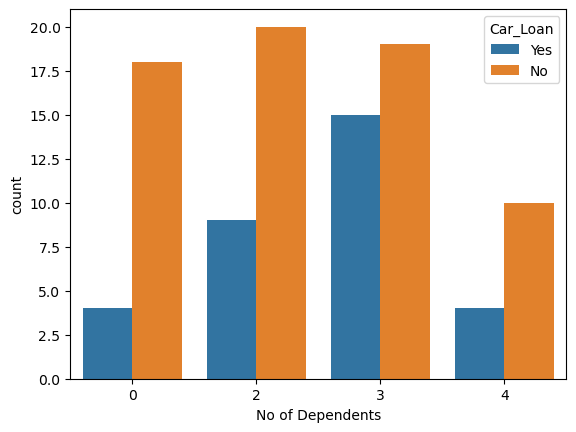

In [19]:
sns.countplot(x="No of Dependents",data=df,hue="Car_Loan")

In [20]:
df['Marrital Status'].replace({'Single':0,'Married':1},inplace=True)
df['Car_Loan'].replace({'No':0,'Yes':1},inplace=True)
df['Education'].replace({'Graduate':0,'Post Graduate':1},inplace=True)
df['Profession'].replace({'Salaried':0, 'Business':1},inplace=True)

C:\Users\ppsam\AppData\Local\Temp\ipykernel_29196\3270729769.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marrital Status'].replace({'Single':0,'Married':1},inplace=True)
C:\Users\ppsam\AppData\Local\Temp\ipykernel_29196\3270729769.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['M

In [21]:
df.sample(5)

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
87,33,0,1,1,2,0,2200000,1200000
61,30,0,0,1,0,0,1500000,1500000
40,31,1,1,1,3,1,1700000,800000
35,42,0,1,1,3,0,3700000,1600000
59,28,0,0,0,0,1,900000,700000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               99 non-null     int64
 1   Profession        99 non-null     int64
 2   Marrital Status   99 non-null     int64
 3   Education         99 non-null     int64
 4   No of Dependents  99 non-null     int64
 5   Car_Loan          99 non-null     int64
 6   Total Salary      99 non-null     int64
 7   EV_Price          99 non-null     int64
dtypes: int64(8)
memory usage: 6.3 KB


<Axes: >

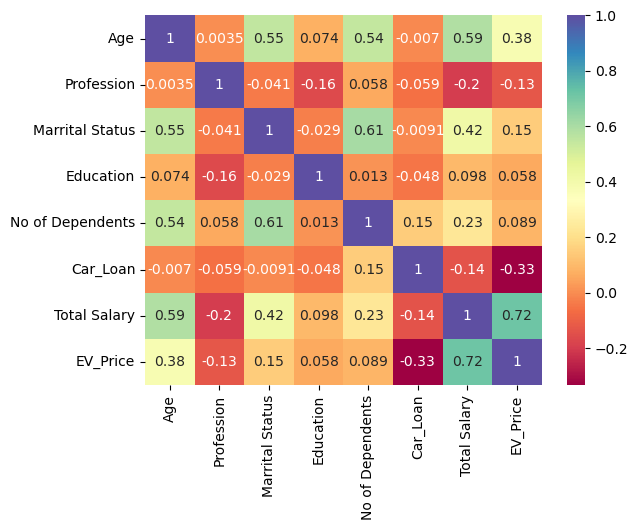

In [23]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot = True, cmap= "Spectral")

# PCA

In [24]:
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
pca = PCA()
pca.fit_transform(X_scaled) 
pca.explained_variance_ratio_

array([0.34653101, 0.1920909 , 0.14332375, 0.11282393, 0.08822937,
       0.04894954, 0.04512684, 0.02292466])

In [26]:
df_pca = pca.transform(X_scaled)

In [27]:
df_pca = pd.DataFrame(df_pca, columns = [f'PC{x +1}' for x in range(len(df.columns))])

In [28]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-3.456779,0.618798,-1.775729,-0.151357,1.047749,-0.231056,0.256545,-0.154749
1,-0.274146,-0.658946,-1.695786,-0.042108,0.291098,0.405744,-0.405434,-0.339778
2,0.879912,-2.388637,0.925667,-0.363319,1.116538,-0.453815,0.486613,-0.524482
3,0.771649,-0.376038,0.757106,1.685393,0.163439,0.046867,0.143957,-0.072337
4,0.219923,0.252808,-1.513077,-0.399144,0.710610,-0.056085,-1.392625,-0.544492


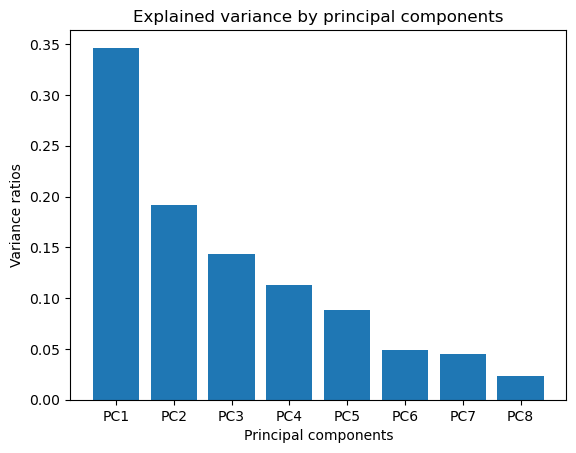

In [29]:
plt.bar(df_pca.columns, pca.explained_variance_ratio_)
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Variance ratios')
plt.show()

In [30]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [31]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.673480,0.346531,0.346531
PC2,1.245957,0.192091,0.538622
PC3,1.076239,0.143324,0.681946
PC4,0.954883,0.112824,0.794770
PC5,0.844415,0.088229,0.882999
PC6,0.628961,0.048950,0.931948
PC7,0.603903,0.045127,0.977075
PC8,0.430429,0.022925,1.000000


In [32]:
pca = PCA(n_components=5)
df_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3','PC4','PC5'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.456779,0.618798,-1.775729,-0.151357,1.047749
1,-0.274146,-0.658946,-1.695786,-0.042108,0.291098
2,0.879912,-2.388637,0.925667,-0.363319,1.116538
3,0.771649,-0.376038,0.757106,1.685393,0.163439
4,0.219923,0.252808,-1.513077,-0.399144,0.710610


In [33]:
factor_loadings = pd.DataFrame(pca.components_, columns = df.columns, index = df_pca.columns).T

In [34]:
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5
Age,0.501727,-0.146188,0.023201,0.076935,0.174596
Profession,-0.083224,-0.251248,0.681966,0.446112,0.465315
Marrital Status,0.437035,-0.326370,0.016456,0.021873,-0.422051
Education,0.066327,0.208098,-0.555692,0.779063,0.136463
No of Dependents,0.379792,-0.475587,-0.025641,0.150289,-0.153474
Car_Loan,-0.082900,-0.484098,-0.447788,-0.331813,0.622676
Total Salary,0.495287,0.276125,-0.024150,-0.182478,0.260782
EV_Price,0.386678,0.478437,0.153508,-0.147184,0.277420


C:\Users\ppsam\AppData\Local\Temp\ipykernel_29196\233902942.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
C:\Users\ppsam\AppData\Local\Temp\ipykernel_29196\233902942.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')


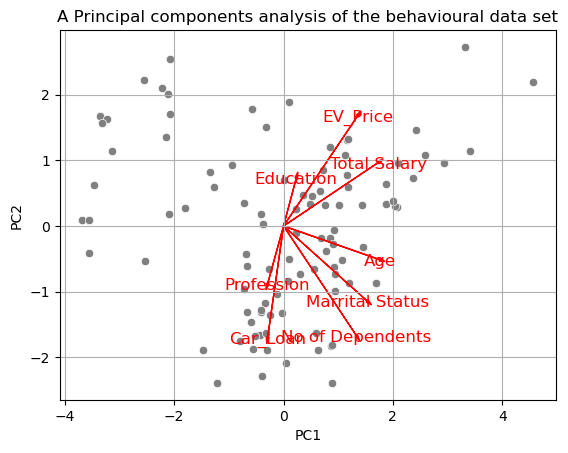

In [35]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the behavioural data set')
plt.grid(True)
plt.savefig("pca_2w.png", format = 'png')
plt.show()

In [36]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.456779,0.618798,-1.775729,-0.151357,1.047749
1,-0.274146,-0.658946,-1.695786,-0.042108,0.291098
2,0.879912,-2.388637,0.925667,-0.363319,1.116538
3,0.771649,-0.376038,0.757106,1.685393,0.163439
4,0.219923,0.252808,-1.513077,-0.399144,0.710610


In [37]:
df_km = [KMeans(n_clusters = k, random_state = 42).fit(X_scaled) for k in range(1, 9)]

C:\Users\ppsam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ppsam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ppsam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ppsam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [38]:
wcss = [model.inertia_ for model in df_km]

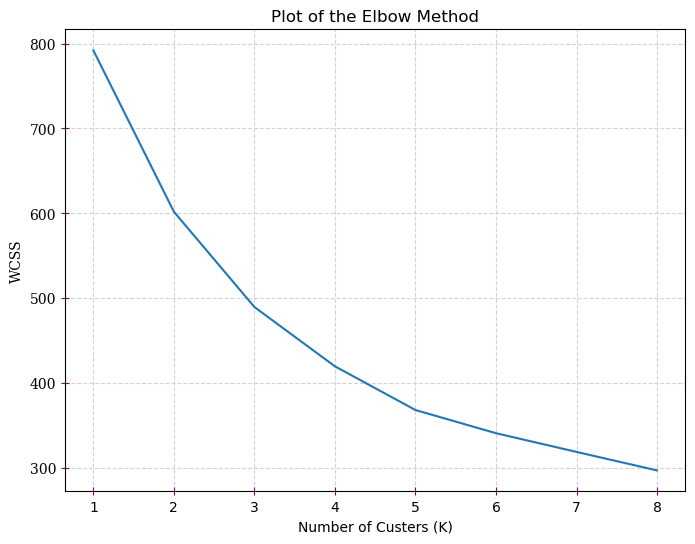

In [39]:
plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method')
plt.plot(range(1,9), wcss)
plt.xticks(range(1,9))
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [40]:
kmean = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmean.fit(X_pca)

C:\Users\ppsam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ppsam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [41]:
print(kmean.labels_)

[2 1 1 4 1 1 0 4 4 1 0 1 2 2 1 3 2 2 2 0 0 4 4 4 1 0 1 4 1 0 4 0 3 4 1 3 4
 0 2 0 1 4 0 0 1 0 4 4 0 1 4 3 3 3 3 3 0 2 2 2 2 2 2 1 0 4 1 0 3 4 4 0 0 0
 4 0 1 4 3 3 1 3 1 0 1 1 2 0 0 1 0 3 0 2 2 3 1 3 1]


In [42]:
pd.Series(kmean.labels_).value_counts()

0    25
1    24
4    19
2    16
3    15
Name: count, dtype: int64

In [43]:
df['clusters'] = kmean.labels_

In [44]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price,clusters
0,27,0,0,1,0,1,800000,800000,2
1,35,0,1,1,2,1,2000000,1000000,1
2,45,1,1,0,4,1,1800000,1200000,1
3,41,1,1,1,3,0,2200000,1200000,4
4,31,0,1,1,2,1,2600000,1600000,1


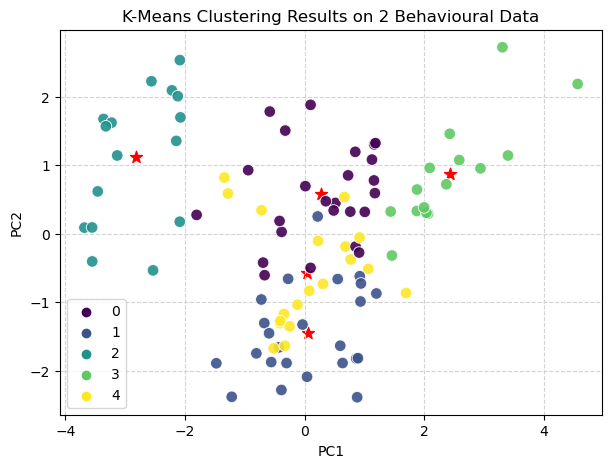

In [45]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.title('K-Means Clustering Results on 2 Behavioural Data')
plt.show()

# Predictions

In [46]:
df["clusters"].value_counts()

clusters
0    25
1    24
4    19
2    16
3    15
Name: count, dtype: int64

In [47]:
Cluster_0=df[df.clusters==0]
Cluster_1=df[df.clusters==1]
Cluster_2=df[df.clusters==2]
Cluster_3=df[df.clusters==3]
Cluster_4=df[df.clusters==4]

In [48]:
[Cluster_0["Age"].value_counts().head(),
Cluster_1["Age"].value_counts().head(),
Cluster_2["Age"].value_counts().head(),
Cluster_3["Age"].value_counts().head(),
Cluster_4["Age"].value_counts().head()]

[Age
 35    4
 37    4
 31    3
 36    3
 34    3
 Name: count, dtype: int64,
 Age
 35    4
 31    4
 34    3
 36    3
 42    3
 Name: count, dtype: int64,
 Age
 27    6
 29    3
 30    3
 28    2
 26    1
 Name: count, dtype: int64,
 Age
 44    4
 41    3
 49    2
 42    1
 39    1
 Name: count, dtype: int64,
 Age
 36    6
 41    2
 35    2
 37    2
 33    1
 Name: count, dtype: int64]

In [49]:
[Cluster_0["Education"].value_counts().head(),
Cluster_1["Education"].value_counts().head(),
Cluster_2["Education"].value_counts().head(),
Cluster_3["Education"].value_counts().head(),
Cluster_4["Education"].value_counts().head()]

[Education
 0    13
 1    12
 Name: count, dtype: int64,
 Education
 1    12
 0    12
 Name: count, dtype: int64,
 Education
 1    10
 0     6
 Name: count, dtype: int64,
 Education
 1    13
 0     2
 Name: count, dtype: int64,
 Education
 0    10
 1     9
 Name: count, dtype: int64]

In [50]:
[Cluster_0["Profession"].value_counts().head(),
Cluster_1["Profession"].value_counts().head(),
Cluster_2["Profession"].value_counts().head(),
Cluster_3["Profession"].value_counts().head(),
 Cluster_4["Profession"].value_counts().head()]

[Profession
 0    25
 Name: count, dtype: int64,
 Profession
 0    16
 1     8
 Name: count, dtype: int64,
 Profession
 0    10
 1     6
 Name: count, dtype: int64,
 Profession
 0    13
 1     2
 Name: count, dtype: int64,
 Profession
 1    19
 Name: count, dtype: int64]

In [51]:
[Cluster_0["Car_Loan"].value_counts().head(),
Cluster_1["Car_Loan"].value_counts().head(),
Cluster_2["Car_Loan"].value_counts().head(),
Cluster_3["Car_Loan"].value_counts().head(),
Cluster_4["Car_Loan"].value_counts().head()]

[Car_Loan
 0    25
 Name: count, dtype: int64,
 Car_Loan
 1    24
 Name: count, dtype: int64,
 Car_Loan
 0    11
 1     5
 Name: count, dtype: int64,
 Car_Loan
 0    12
 1     3
 Name: count, dtype: int64,
 Car_Loan
 0    19
 Name: count, dtype: int64]

In [52]:
[Cluster_0["Total Salary"].value_counts().head(),
Cluster_1["Total Salary"].value_counts().head(),
Cluster_2["Total Salary"].value_counts().head(),
Cluster_3["Total Salary"].value_counts().head(),
Cluster_4["Total Salary"].value_counts().head()]

[Total Salary
 2100000    3
 1300000    2
 2500000    2
 2900000    2
 2200000    2
 Name: count, dtype: int64,
 Total Salary
 1800000    3
 1900000    3
 2000000    2
 2600000    2
 1300000    2
 Name: count, dtype: int64,
 Total Salary
 800000     3
 1400000    3
 900000     3
 1100000    2
 1700000    1
 Name: count, dtype: int64,
 Total Salary
 4500000    2
 3100000    2
 4000000    2
 3000000    1
 3700000    1
 Name: count, dtype: int64,
 Total Salary
 1400000    3
 2000000    3
 1600000    3
 2200000    2
 1900000    1
 Name: count, dtype: int64]